# Lab 6
# Mariah Noelle Cornelio
# **UTA ID:** 1002053287
# ***My solutions for Exercises 1-5***
---

Scikit learn provides a large variety of algorithms for some common Machine Learning tasks, such as:

* Classification
* Regression
* Clustering
* Feature Selection
* Anomaly Detection

It also provides some datasets that you can use to test these algorithms:

* Classification Datasets:
    * Breast cancer wisconsin
    * Iris plants (3-classes)
    * Optical recognition of handwritten digits (10-classes)
    * Wine (n-classes)

* Regression Datasets: 
    * Boston house prices 
    * Diabetes
    * Linnerrud (multiple regression)
    * California Housing

* Image: 
    * The Olivetti faces
    * The Labeled Faces in the Wild face recognition
    * Forest covertypes

* NLP:
    * News group
    * Reuters Corpus Volume I 

* Other:
    * Kddcup 99- Intrusion Detection

## Exercises

1. Use the full [Kddcup](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html) dataset to compare classification performance of 3 different classifiers. 
    * Separate the data into train, validation, and test. 
    * Use accuracy as the metric for assessing performance. 
    * For each classifier, identify the hyperparameters. Perform optimization over at least 2 hyperparameters.   
    * Compare the performance of the optimal configuration of the classifiers.

2. Pick the best algorithm in question 1. Create an ensemble of at least 25 models, and use them for the classification task. Identify the top and bottom 10% of the data in terms of uncertainty of the decision.

3. Use 2 different feature selection algorithm to identify the 10 most important features for the task in question 1. Retrain classifiers in question 1 with just this subset of features and compare performance.

4. Use the same data, removing the labels, and compare performance of 3 different clustering algorithms. Can you find clusters for each of the classes in question 1? 

5. Can you identify any clusters within the top/botton 10% identified in 2. What are their characteristics?

6. Use the "SA" dataset to compare the performance of 3 different anomaly detection algorithms.

7. Create a subsample of 250 datapoints, redo question 6, using Leave-one-out as the method of evaluation.

8. Use the feature selection algorithm to identify the 5 most important features for the task in question 6, for each algorithm. Does the anomaly detection improve using less features?

## Quick look at the data

In [2]:
from sklearn.datasets import fetch_kddcup99
D=fetch_kddcup99()

In [3]:
dir(D)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
print(D["DESCR"])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [5]:
dir(D)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
import numpy as np
np.unique(D["target"])

array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
       b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
       b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
       b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
       b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object)

In [7]:
len(np.unique(D["target"]))

23

In [8]:
D["feature_names"]

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

# Exercise 1
## Data preprocessing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# Creating the dataframe to work with
df=pd.DataFrame(D.data, columns=D.feature_names)
df["target"]=D.target
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [11]:
df.shape
# 494k rows and 42 columns

(494021, 42)

In [12]:
df.isnull().sum()

# No null values!

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [13]:
df.dtypes

# We want to turn these into numbers or their respective data types
# This website: https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# Provides what the data types are for this dataset

continuous_columns=["duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "hot",
    "num_failed_logins", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", 
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", 
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", 
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", 
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
    "dst_host_srv_rerror_rate"]

df[continuous_columns]=df[continuous_columns].apply(pd.to_numeric, errors="coerce")

In [14]:
print(df.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                            object
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                       object
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                   object
is_guest_login                  object
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
print(df["target"].value_counts())

# We want to turn this into numbers rather than words so let's assign each classification with a number
# These are byte strings, not regular strings so we need to convert that first

df["target"]=df["target"].str.decode("utf-8")
target_mapping={
    "smurf.": 0,
    "neptune.": 1,
    "normal.": 2,
    "back.": 3,
    "satan.": 4,
    "ipsweep.": 5,
    "portsweep.": 6,
    "warezclient.": 7,
    "teardrop.": 8,
    "pod.": 9,
    "nmap.": 10,
    "guess_passwd.": 11,
    "buffer_overflow.": 12,
    "land.": 13,
    "warezmaster.": 14,
    "imap.": 15,
    "rootkit.": 16,
    "loadmodule.": 17,
    "ftp_write.": 18,
    "multihop.": 19,
    "phf.": 20,
    "perl.": 21,
    "spy.": 22}

df["target"]=df["target"].replace(target_mapping)

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: target, dtype: int64


In [16]:
print(df.isnull().sum())
print(df.shape)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [17]:
df["target"].value_counts()

0     280790
1     107201
2      97278
3       2203
4       1589
5       1247
6       1040
7       1020
8        979
9        264
10       231
11        53
12        30
13        21
14        20
15        12
16        10
17         9
18         8
19         7
20         4
21         3
22         2
Name: target, dtype: int64

In [18]:
# Let's take a look at the rest of the categorical values and label encode them so it is easier for the algorithms to train
object_cols=df.select_dtypes(include=["object"]).columns
print(object_cols)

Index(['protocol_type', 'service', 'flag', 'land', 'logged_in',
       'is_host_login', 'is_guest_login'],
      dtype='object')


In [19]:
print(df["protocol_type"].value_counts())
print(df["service"].value_counts())
print(df["flag"].value_counts())
print(df["land"].value_counts())
print(df["logged_in"].value_counts())
print(df["is_host_login"].value_counts())
print(df["is_guest_login"].value_counts())

b'icmp'    283602
b'tcp'     190065
b'udp'      20354
Name: protocol_type, dtype: int64
b'ecr_i'      281400
b'private'    110893
b'http'        64293
b'smtp'         9723
b'other'        7237
               ...  
b'X11'            11
b'tim_i'           7
b'pm_dump'         1
b'tftp_u'          1
b'red_i'           1
Name: service, Length: 66, dtype: int64
b'SF'        378440
b'S0'         87007
b'REJ'        26875
b'RSTR'         903
b'RSTO'         579
b'SH'           107
b'S1'            57
b'S2'            24
b'RSTOS0'        11
b'S3'            10
b'OTH'            8
Name: flag, dtype: int64
0    493999
1        22
Name: land, dtype: int64
0    420784
1     73237
Name: logged_in, dtype: int64
0    494021
Name: is_host_login, dtype: int64
0    493336
1       685
Name: is_guest_login, dtype: int64


In [20]:
# We can turn land, logged_in, is_host_login, and is_guest_login into integers
# df["land"]=df["land"].astype(int) -> my original approach, but it didn't work 
df["land"]=df["land"].replace({0:0, 1:1}) # -> use a dictionary approach
# df["logged_in"]=df["logged_in"].astype(int)
df["logged_in"]=df["logged_in"].replace({0:0, 1:1})
# df["is_host_login"]=df["is_host_login"].astype(int)
df["is_host_login"]=df["is_host_login"].replace({0:0, 1:1})
# df["is_guest_login"]=df["is_guest_login"].astype(int)
df["is_guest_login"]=df["is_guest_login"].replace({0:0, 1:1})
print(df["land"].value_counts())
print(df["logged_in"].value_counts())
print(df["is_host_login"].value_counts())
print(df["is_guest_login"].value_counts())

0    493999
1        22
Name: land, dtype: int64
0    420784
1     73237
Name: logged_in, dtype: int64
0    494021
Name: is_host_login, dtype: int64
0    493336
1       685
Name: is_guest_login, dtype: int64


In [21]:
# Turn the other column objects into numberrs
protocol_mapping={b'icmp':0, b'tcp':1, b'udp':2}
# service_mapping={b'ecr_i':0, b'private':1, b'http':2, b'smtp':3, b'other':4}
service_mapping={b'ecr_i':0, b'private':1, b'http':2, b'smtp':3, b'other':4,
    b'domain_u':5, b'ftp_data':6, b'eco_i':7, b'ftp':8, b'finger':9,
    b'urp_i':10, b'telnet':11, b'ntp_u':12, b'auth':13, b'pop_3':14,
    b'time':15, b'csnet_ns':16, b'remote_job':17, b'gopher':18, b'imap4':19,
    b'discard':20, b'domain':21, b'iso_tsap':22, b'systat':23, b'shell':24,
    b'echo':25, b'rje':26, b'whois':27, b'sql_net':28, b'printer':29,
    b'nntp':30, b'courier':31, b'sunrpc':32, b'netbios_ssn':33, b'mtp':34,
    b'vmnet':35, b'uucp_path':36, b'uucp':37, b'klogin':38, b'bgp':39,
    b'ssh':40, b'supdup':41, b'nnsp':42, b'login':43, b'hostnames':44,
    b'efs':45, b'daytime':46, b'link':47, b'netbios_ns':48, b'pop_2':49,
    b'ldap':50, b'netbios_dgm':51, b'exec':52, b'http_443':53, b'kshell':54,
    b'name':55, b'ctf':56, b'netstat':57, b'Z39_50':58, b'IRC':59,
    b'urh_i':60, b'X11':61, b'tim_i':62, b'pm_dump':63, b'tftp_u':64, b'red_i':65}
flag_mapping={b'SF':0, b'S0':1, b'REJ':2, b'RSTR':3, b'RSTO':4, b'SH':5, b'S1':6, b'S2':7,
              b'RSTOS0':8, b'S3':9, b'OTH':10}

df["protocol_type"].replace(protocol_mapping, inplace=True)
df["service"].replace(service_mapping, inplace=True)
df["flag"].replace(flag_mapping, inplace=True)

print(df["protocol_type"].value_counts())
print(df["service"].value_counts())
print(df["flag"].value_counts())

0    283602
1    190065
2     20354
Name: protocol_type, dtype: int64
0     281400
1     110893
2      64293
3       9723
4       7237
       ...  
61        11
62         7
63         1
64         1
65         1
Name: service, Length: 66, dtype: int64
0     378440
1      87007
2      26875
3        903
4        579
5        107
6         57
7         24
8         11
9         10
10         8
Name: flag, dtype: int64


In [22]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

## Separate into train, validation, and test

In [23]:
X=df.drop(columns=["target"], axis=1)
y=df["target"]

X_train, X_temp, y_train, y_temp=train_test_split(X, y, test_size=0.3, random_state=11)
X_val, X_test, y_val, y_test=train_test_split(X_temp, y_temp, test_size=0.5, random_state=11)

# Tried to do it with stratify but becuase some of the classes has only 1 instance, 
# We cannot do it so just no stratifying for this workflow

print(X.head(5))
print(y.head(5))

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1        2     0        181       5450     0   
1         0              1        2     0        239        486     0   
2         0              1        2     0        235       1337     0   
3         0              1        2     0        219       1337     0   
4         0              1        2     0        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...               9                   9   
1               0       0    0  ...              19                  19   
2               0       0    0  ...              29                  29   
3               0       0    0  ...              39                  39   
4               0       0    0  ...              49                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1   

In [24]:
print(X.shape, X_train.shape, X_val.shape, X_test.shape)
print(y.shape, y_train.shape, y_val.shape, y_test.shape)

(494021, 41) (345814, 41) (74103, 41) (74104, 41)
(494021,) (345814,) (74103,) (74104,)


## Defining my algorithms and testing/optimizing hyperparameters for best results

Note that LR and SVM requires standardization but random forest does not! But we will still standardize random forest because we want to compare these 3 classification models.

In [27]:
# The classification models I chose for this is
# 1) LR - logistic regression
# 2) Random forest
# 3) SVM - support vector machine classification

# I ran it for the first time before doing optimizations and standardizing and these are my results:
# Logistic Regression model accuracy on validation set: 0.9880031847563526
# Random Forest model accuracy on validation set: 0.9998245685059984

# SVM took too long so I just ran those two... it seems random forest is doing good without
# standardizing nor optimization

# Rerunning it now that I have more time - estimated 1 hour to run

def train_and_evaluate_classifier(pipeline, param_grid, X_train, y_train, X_val, y_val):
    # Use grid search to find the best models
    grid_search=GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy")
    grid_search.fit(X_train, y_train)
    best_model=grid_search.best_estimator_
    
    y_val_pred=best_model.predict(X_val)
    accuracy=accuracy_score(y_val, y_val_pred)
    print(f"Best model accuracy on validation set: {accuracy}")
    return best_model

# My 3 classifiers
classifiers={"Logistic Regression": LogisticRegression(), "Random Forest": RandomForestClassifier(),
    "SVM": SVC()}

# Can choose your own parameters - I looked up the best starting ones
param_grids={
    "Logistic Regression": {"classifier__C": [0.1, 1, 10], "classifier__solver": ["liblinear"]},
    "Random Forest": {"classifier__n_estimators": [100, 200], "classifier__max_depth": [10, 20, None]},
    "SVM": {"classifier__C": [0.1, 1, 10], "classifier__kernel": ["linear", "rbf"]}}

best_classifiers={}
for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    pipeline=Pipeline([ # Use pipeline to make things go by faster adn repeat for the 3 classifiers
        ("scaler", StandardScaler()), 
        ("classifier", clf)])
    best_model=train_and_evaluate_classifier(pipeline, param_grids[name], X_train, y_train, X_val, y_val)
    best_classifiers[name]=best_model

# Evaluation
for name, model in best_classifiers.items():
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test accuracy of {name}: {test_accuracy}")



Training Logistic Regression...


/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/skl

Best model accuracy on validation set: 0.9984885902055247

Training Random Forest...
Best model accuracy on validation set: 0.9998380632363062

Training SVM...


/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best model accuracy on validation set: 0.9995546738998421
Test accuracy of Logistic Regression: 0.9984481269567095
Test accuracy of Random Forest: 0.9997301090359495
Test accuracy of SVM: 0.9995951635539242


## Running the classifers without a loop - takes way longer, I tried (the loop above is better but I just included this part to try it out)

In [ ]:
# 1) Logistic regression training and optimizing hyperparameters pipeline

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 
# lr_model=LogisticRegression()
lr_model=LogisticRegression(max_iter=500, class_weight="balanced:)")
# param_grid_lr={"C":[0.1,1,10],"solver":["lbfgs","liblinear"]}
param_grid_lr={"C":[0.1,1,10],"solver":["saga"]}

grid_search_lr=GridSearchCV(lr_model,param_grid_lr,cv=5,scoring="accuracy")
grid_search_lr.fit(X_train_scaled,y_train)
best_params_lr=grid_search_lr.best_params_
print("Best hyperparameters for Logistic Regression:",best_params_lr)

lr_model_optimal=LogisticRegression(**best_params_lr)
lr_model_optimal.fit(X_train_scaled,y_train)

y_pred_lr_opt=lr_model_optimal.predict(X_test_scaled)
accuracy_lr_opt=accuracy_score(y_test,y_pred_lr_opt)
print("Optimized Logistic Regression Accuracy:",accuracy_lr_opt)

In [ ]:
# 2) Random forest training and optimizing hyperparameters pipeline

rf_model=RandomForestClassifier()
param_grid_rf={"n_estimators":[50,100,200],"max_depth":[10,20,None]}

random_search_rf=RandomizedSearchCV(rf_model,param_distributions=param_grid_rf,n_iter=10,cv=5,scoring="accuracy",random_state=11)
random_search_rf.fit(X_train_scaled,y_train)
best_params_rf=random_search_rf.best_params_
print("Best hyperparameters for Random Forest:",best_params_rf)

rf_model_optimal=RandomForestClassifier(**best_params_rf)
rf_model_optimal.fit(X_train_scaled,y_train)

y_pred_rf_opt=rf_model_optimal.predict(X_test_scaled)
accuracy_rf_opt=accuracy_score(y_test,y_pred_rf_opt)
print("Optimized Random Forest Accuracy:",accuracy_rf_opt)

In [ ]:
# 3) SVM training and optimizing hyperparameters pipeline

svm_model=SVC()
param_grid_svm={"C":[0.1,1,10],"kernel":["linear","rbf"]}

grid_search_svm=GridSearchCV(svm_model,param_grid_svm,cv=5,scoring="accuracy")
grid_search_svm.fit(X_train_scaled,y_train)
best_params_svm=grid_search_svm.best_params_
print("Best hyperparameters for SVM:",best_params_svm)

svm_model_optimal=SVC(**best_params_svm)
svm_model_optimal.fit(X_train_scaled,y_train)

y_pred_svm_opt=svm_model_optimal.predict(X_test_scaled)
accuracy_svm_opt=accuracy_score(y_test,y_pred_svm_opt)
print("Optimized SVM Accuracy:",accuracy_svm_opt)

## Comparing performance using accuracy score

From the accuracy scores above, the best model is: RANDOM FOREST!

- LR:0.9984481269567095
- RFC:0.9997301090359495
- SVM:0.9995951635539242

Test accuracy of Logistic Regression: 0.9984481269567095
Test accuracy of Random Forest: 0.9997301090359495
Test accuracy of SVM: 0.9995951635539242

# Exercise 2
## Creating an ensemble of Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled= scaler.transform(X_val)
X_test_scaled= scaler.transform(X_test)

n_models=25
models=[]
predictions=np.zeros((X_val_scaled.shape[0], n_models, len(np.unique(y))))

for i in range(n_models):
    model=RandomForestClassifier(n_estimators=100, random_state=i)
    model.fit(X_train_scaled, y_train)
    models.append(model)
    predictions[:, i, :]=model.predict_proba(X_val_scaled)

## Identifying top and bottom 10% in terms of uncertainty

In [26]:
def calculate_entropy(predictions):
    prob=np.mean(predictions, axis=1)  # Mean probabilities across models
    entropy=-np.sum(prob*np.log(prob+1e-10), axis=1)  # Sum entropy across classes
    return entropy

uncertainty=calculate_entropy(predictions) # Calculate entropy for each instance

threshold_top=np.percentile(uncertainty, 90) 
threshold_bottom=np.percentile(uncertainty, 10) 
top_uncertainty_indices=np.where(uncertainty>=threshold_top)[0] # Find the indices
bottom_uncertainty_indices=np.where(uncertainty<=threshold_bottom)[0]
top_uncertainty_samples=X_val_scaled[top_uncertainty_indices] # Get the indices
bottom_uncertainty_samples=X_val_scaled[bottom_uncertainty_indices]

print(f'Top 10% Uncertainty Instances: {top_uncertainty_samples.shape[0]}')
print(f'Bottom 10% Uncertainty Instances: {bottom_uncertainty_samples.shape[0]}')

Top 10% Uncertainty Instances: 74103
Bottom 10% Uncertainty Instances: 71896


This means our model is very confident in 71,896 predictions (bottom 10%) and uncertain in 74,103 predictions (top 10%). These values are pretty high for uncertainties, suggesting there may be overlap or extra noise in the dataset.

In [27]:
# Trying the above pipeline without standardizing our values

n_models=25
models=[]
predictions=np.zeros((X_val.shape[0], n_models, len(np.unique(y))))

for i in range(n_models):
    model=RandomForestClassifier(n_estimators=100, random_state=i)
    model.fit(X_train, y_train)  # Unstandardized data
    models.append(model)
    predictions[:, i, :]=model.predict_proba(X_val)

def calculate_entropy(predictions):
    prob=np.mean(predictions, axis=1)
    entropy=-np.sum(prob * np.log(prob + 1e-10), axis=1) 
    return entropy

uncertainty=calculate_entropy(predictions)
threshold_top=np.percentile(uncertainty, 90) 
threshold_bottom=np.percentile(uncertainty, 10) 
top_uncertainty_indices=np.where(uncertainty>=threshold_top)[0]
bottom_uncertainty_indices=np.where(uncertainty<=threshold_bottom)[0]
top_uncertainty_samples=X_val.iloc[top_uncertainty_indices]
bottom_uncertainty_samples=X_val.iloc[bottom_uncertainty_indices]
print(f'Top 10% Uncertainty Instances: {top_uncertainty_samples.shape[0]}')
print(f'Bottom 10% Uncertainty Instances: {bottom_uncertainty_samples.shape[0]}')

# There's no difference!

Top 10% Uncertainty Instances: 74103
Bottom 10% Uncertainty Instances: 71896


# Exercise 3
The 2 feature selection algorithms I chose are recursive feature elimination (RFE) and SelectFromModel using my Random Forest model.

## Feature selection algorithms

In [31]:
# RFE
rfc=RandomForestClassifier(n_estimators=100, random_state=11)
rfe=RFE(estimator=rfc, n_features_to_select=10)
rfe.fit(X_train, y_train)

rfe_support=rfe.support_
rfe_feature_names=X.columns[rfe_support]
print("Top 10 Features using RFE:")
print(rfe_feature_names)

Top 10 Features using RFE:
Index(['protocol_type', 'service', 'flag', 'src_bytes', 'count', 'srv_count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_same_src_port_rate'],
      dtype='object')


In [32]:
# SelectFromModel

rfc.fit(X_train, y_train)
model=SelectFromModel(rfc, prefit=True, threshold="median") # Features above median
X_train_selected=model.transform(X_train)
X_val_selected=model.transform(X_val)

selected_feature_indices=model.get_support(indices=True)
selected_feature_names=X.columns[selected_feature_indices]
print("Top 10 Features using SelectFromModel:")
print(selected_feature_names)

Top 10 Features using SelectFromModel:
Index(['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate'],
      dtype='object')


/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## Retraining the classifiers using the union between both sets (so no bias)

In [34]:
combined_features=np.unique(np.concatenate((rfe_feature_names, selected_feature_names)))

X_train_combined=X_train.loc[:, np.isin(X.columns, combined_features)]
X_val_combined=X_val.loc[:, np.isin(X.columns, combined_features)]
X_test_combined=X_test.loc[:, np.isin(X.columns, combined_features)]

# Retraining RFC
rfc_combined=RandomForestClassifier(n_estimators=100, random_state=42)
rfc_combined.fit(X_train_combined, y_train)
y_val_pred_combined=rfc_combined.predict(X_val_combined)
print(f"Accuracy with Top Features: {accuracy_score(y_val, y_val_pred_combined)}")
print(classification_report(y_val, y_val_pred_combined))

Accuracy with Top Features: 0.9998515579666141
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42026
           1       1.00      1.00      1.00     16233
           2       1.00      1.00      1.00     14538
           3       1.00      1.00      1.00       341
           4       1.00      1.00      1.00       240
           5       0.99      1.00      1.00       176
           6       1.00      1.00      1.00       156
           7       1.00      0.99      1.00       163
           8       1.00      1.00      1.00       134
           9       0.97      1.00      0.99        35
          10       1.00      0.97      0.99        35
          11       1.00      1.00      1.00         9
          12       0.83      1.00      0.91         5
          13       1.00      1.00      1.00         2
          14       0.67      1.00      0.80         2
          15       1.00      1.00      1.00         2
          17       0.00      0.00 

/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marielle/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Accuracy WITH Top Features: 0.9998515579666141
- Accuracy WITHOUT Top Features: 0.9997301090359495

This means the model with the top features is better!

# Exercise 4
The 3 clustering methods I chose are K-means clustering, Gaussian mixture model clustering, and mini batch k-means clustering. For the random forest model, we did not have to standardize but for clustering it is best that we do it for feature scaling. I initially tried DBSCAN and agglomerative clustering but it could not handle this large dataset.

In [25]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)
X_test_scaled=scaler.transform(X_test)

# K-Means Clustering
kmeans=KMeans(n_clusters=3, random_state=1)  # Play around with number of clusters
kmeans_clusters=kmeans.fit_predict(X_train_scaled)

In [26]:
# Code to do DBSCAN Clustering - did not work
# dbscan=DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed - 0.2 episodes to reduce maybe
# dbscan_clusters=dbscan.fit_predict(X_train_scaled)

# NOW TRYING Gaussian mixture modeling clustering

n_components=3 # Play around with number of clusters
gmm=GaussianMixture(n_components=n_components, random_state=11)
gmm_clusters=gmm.fit_predict(X_train_scaled)

In [27]:
# Code to do agglomerative Clustering - did not work
# agglo=AgglomerativeClustering(n_clusters=3)  # Play around with number of clusters
# agglo_clusters=agglo.fit_predict(X_train_scaled)

# NOW TRYING mini batch k means clustering
mb_kmeans=MiniBatchKMeans(n_clusters=3, batch_size=10000, random_state=42)
mb_kmeans_clusters=mb_kmeans.fit_predict(X_train_scaled)

## Evaluating the clustering algorithms

Silhouette Score for K-Means: 0.6730
Silhouette Score for Gaussian Mixture Models (GMM): 0.6622
Silhouette Score for Mini-Batch K-Means: 0.6795


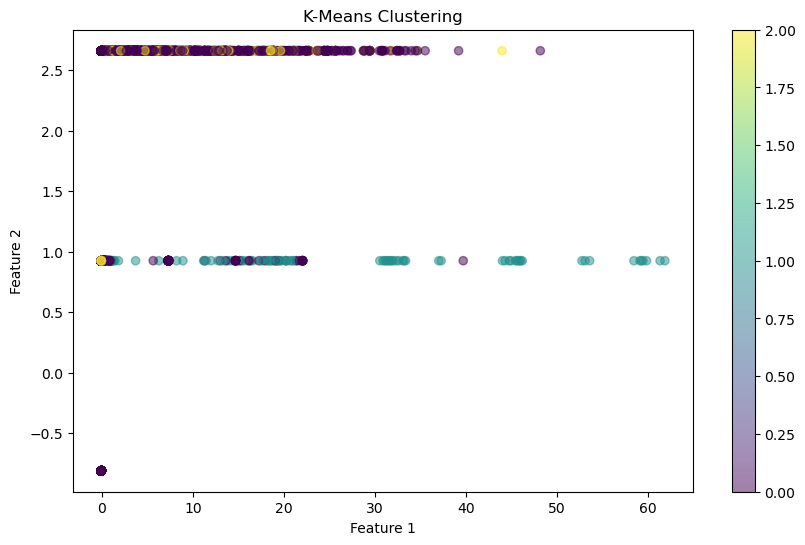

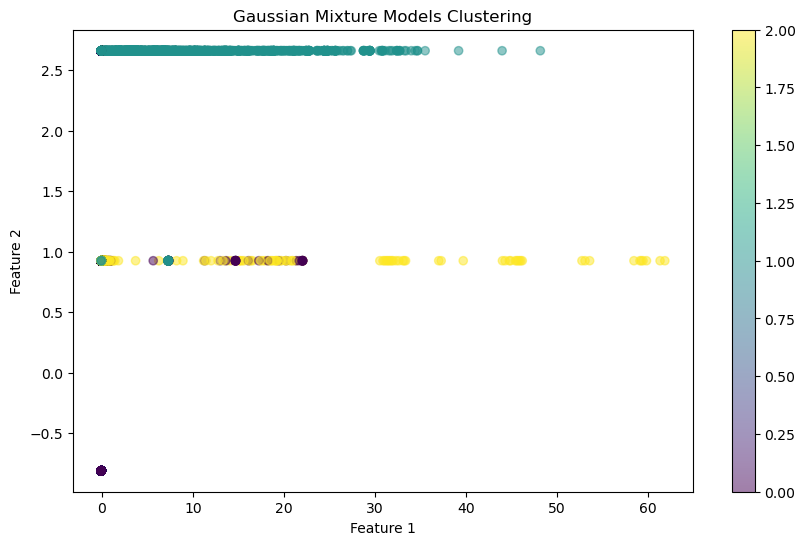

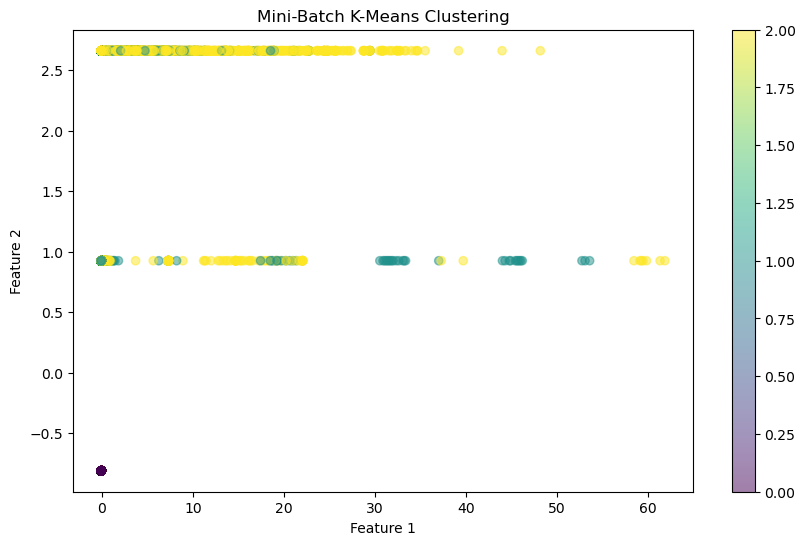


K-Means Clustering vs True Labels:
True Label  K-Means Cluster
0           0                  196860
1           1                   14347
            2                   60501
2           0                   63029
            1                    3804
            2                    1199
3           0                    1503
            1                      15
            2                       4
4           0                      75
            1                     859
            2                     175
5           0                     791
            1                      66
6           0                       1
            1                     694
            2                      14
7           0                     703
            1                       1
            2                       5
8           0                     644
            2                      58
9           0                     186
10          0                      84
            2           

In [28]:
# Runtime for this is an hour

kmeans_score=silhouette_score(X_train_scaled, kmeans_clusters)
gmm_score=silhouette_score(X_train_scaled, gmm_clusters)
mb_kmeans_score=silhouette_score(X_train_scaled, mb_kmeans_clusters)
print(f'Silhouette Score for K-Means: {kmeans_score:.4f}')
print(f'Silhouette Score for Gaussian Mixture Models (GMM): {gmm_score:.4f}')
print(f'Silhouette Score for Mini-Batch K-Means: {mb_kmeans_score:.4f}')

# Plotting the clusters for each algorithm
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis", alpha=0.5)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar()
    plt.show()

plot_clusters(X_train_scaled, kmeans_clusters, "K-Means Clustering")
plot_clusters(X_train_scaled, gmm_clusters, "Gaussian Mixture Models Clustering")
plot_clusters(X_train_scaled, mb_kmeans_clusters, "Mini-Batch K-Means Clustering")

# Compare clusters with true labels
results=pd.DataFrame(X_train)
results["True Label"]=y_train.values
results["K-Means Cluster"]=kmeans_clusters
results["GMM Cluster"]=gmm_clusters
results["Mini-Batch K-Means Cluster"]=mb_kmeans_clusters

print("\nK-Means Clustering vs True Labels:")
print(results.groupby(["True Label", "K-Means Cluster"]).size())
print("\nGaussian Mixture Models (GMM) Clustering vs True Labels:")
print(results.groupby(["True Label", "GMM Cluster"]).size())
print("\nMini-Batch K-Means Clustering vs True Labels:")
print(results.groupby(["True Label", "Mini-Batch K-Means Cluster"]).size())

This cell took an hour to run but here are the main results below:
- K-Means silhouette score: 0.6730
- Gaussian Mixture Model silhouette score (GMM): 0.6622
- Mini-batch K-Means silhouette score: 0.6795

Mini-batch has the highest score, meaning it does the best at clustering and separating the data points.

# Exercise 5

In [30]:
# Rerun exercise 2 real quick

n_models=25
models=[]
predictions=np.zeros((X_val_scaled.shape[0], n_models, len(np.unique(y))))

for i in range(n_models):
    model=RandomForestClassifier(n_estimators=100, random_state=i)
    model.fit(X_train_scaled, y_train)
    models.append(model)
    predictions[:, i, :]=model.predict_proba(X_val_scaled)

def calculate_entropy(predictions):
    prob=np.mean(predictions, axis=1) 
    entropy=-np.sum(prob*np.log(prob+1e-10), axis=1) 
    return entropy

uncertainty=calculate_entropy(predictions) 
threshold_top=np.percentile(uncertainty, 90)
threshold_bottom=np.percentile(uncertainty, 10)
top_uncertainty_indices=np.where(uncertainty>=threshold_top)[0]
bottom_uncertainty_indices=np.where(uncertainty<=threshold_bottom)[0]
top_uncertainty_samples=X_val_scaled[top_uncertainty_indices]
bottom_uncertainty_samples=X_val_scaled[bottom_uncertainty_indices]

print(f'Top 10% Uncertainty Instances: {top_uncertainty_samples.shape[0]}')
print(f'Bottom 10% Uncertainty Instances: {bottom_uncertainty_samples.shape[0]}')


Top 10% Uncertainty Instances: 74103
Bottom 10% Uncertainty Instances: 71896


In [31]:
val_results=pd.DataFrame(X_val_scaled, columns=[f"Feature_{i+1}" for i in range(X_val_scaled.shape[1])])
val_results["Uncertainty"]=uncertainty
val_results["K-Means Cluster"]=kmeans.predict(X_val_scaled)
val_results["GMM Cluster"]=gmm.predict(X_val_scaled)
val_results["Mini-Batch K-Means Cluster"]=mb_kmeans.predict(X_val_scaled)

top_10_percent_results=val_results.iloc[top_uncertainty_indices]
bottom_10_percent_results=val_results.iloc[bottom_uncertainty_indices]

print("Top 10% Uncertainty - Cluster Characteristics:")
print(top_10_percent_results.groupby(["K-Means Cluster", "GMM Cluster", "Mini-Batch K-Means Cluster"]).mean())
print("\nBottom 10% Uncertainty - Cluster Characteristics:")
print(bottom_10_percent_results.groupby(["K-Means Cluster", "GMM Cluster", "Mini-Batch K-Means Cluster"]).mean())


Top 10% Uncertainty - Cluster Characteristics:
                                                        Feature_1  Feature_2  \
K-Means Cluster GMM Cluster Mini-Batch K-Means Cluster                         
0               0           0                           -0.068703  -0.809912   
                            2                            0.251558   1.469868   
                1           0                           -0.068703  -0.583463   
                            1                           -0.068703  -0.313882   
                            2                            1.085184   2.154156   
                2           2                           -0.059241   0.926193   
1               1           1                           -0.068703   0.926193   
                2           1                            0.022921   0.926193   
                            2                            0.130823   0.926193   
2               0           1                           -0.068217   0.926

# Exercise 6 - Using the SA Dataset

**This file is getting too big so I put my solutions for exercises 6-8 into the other file in this directory!**